<a href="https://colab.research.google.com/github/roy232355/MACHINE-LEARNING/blob/main/Heart_Disease_Prediction_Using_MACHINE_LEARNING_ALGORITHMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING THE DEPENDENCIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

# LOADING THE DATA

In [ ]:
url = "/content/heart-disease.csv"
heart_disease_df = pd.read_csv(url)

In [ ]:
# PRINTING THE SHAPE OF THE DATA
heart_disease_df.shape

(303, 14)

In [ ]:
# LOADING THE FIRST 5 AND LAST 5 ROWS OF THE DATA
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_disease_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# CHECKING FOR NULL VALUES
heart_disease_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# CORRELATION BETWEEN THE VARIABLES
corr = heart_disease_df.corr()

# WE CAN SEE THAT OUR VARIABLES ARE NOT HIGHLY CORRELATED TO EACH OTHER

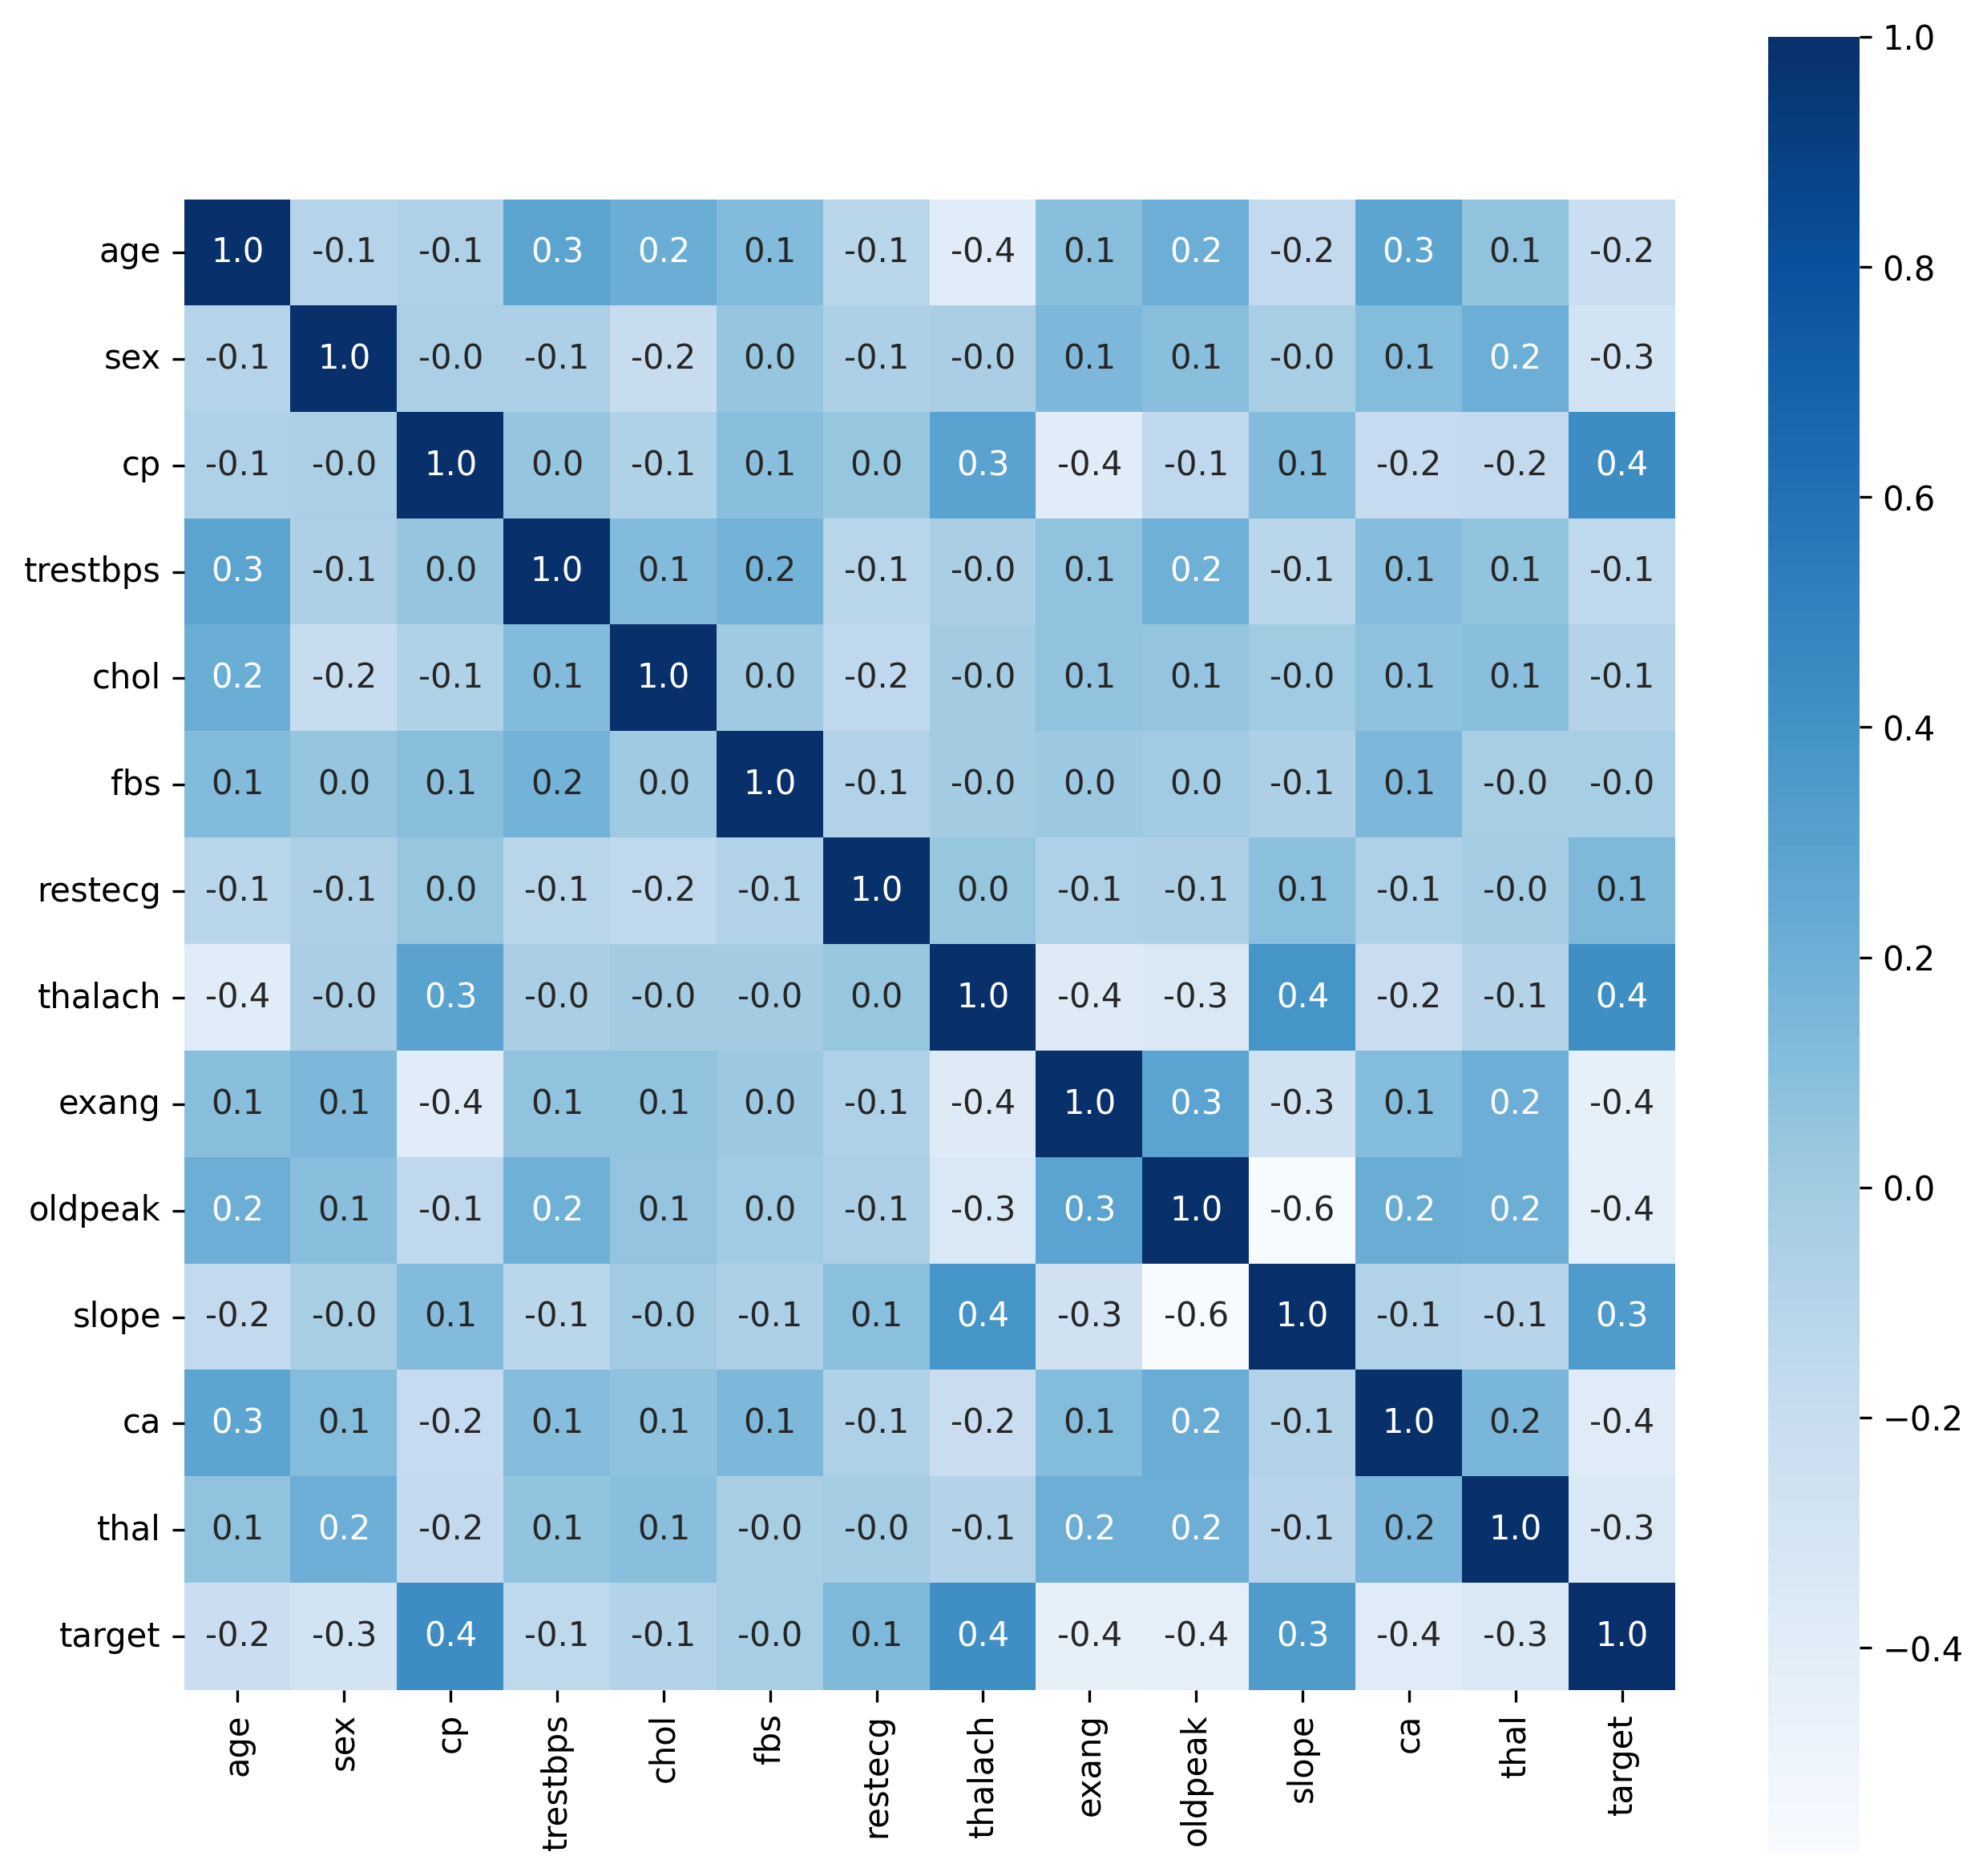

In [ ]:
plt.figure(figsize=(10,10),dpi=300)
sns.heatmap(corr,cmap="Blues",cbar=True, fmt='.1f', annot=True, linecolor="red", square=True)

# UNI VARIATE AND BI VARIATE ON FEATURES

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


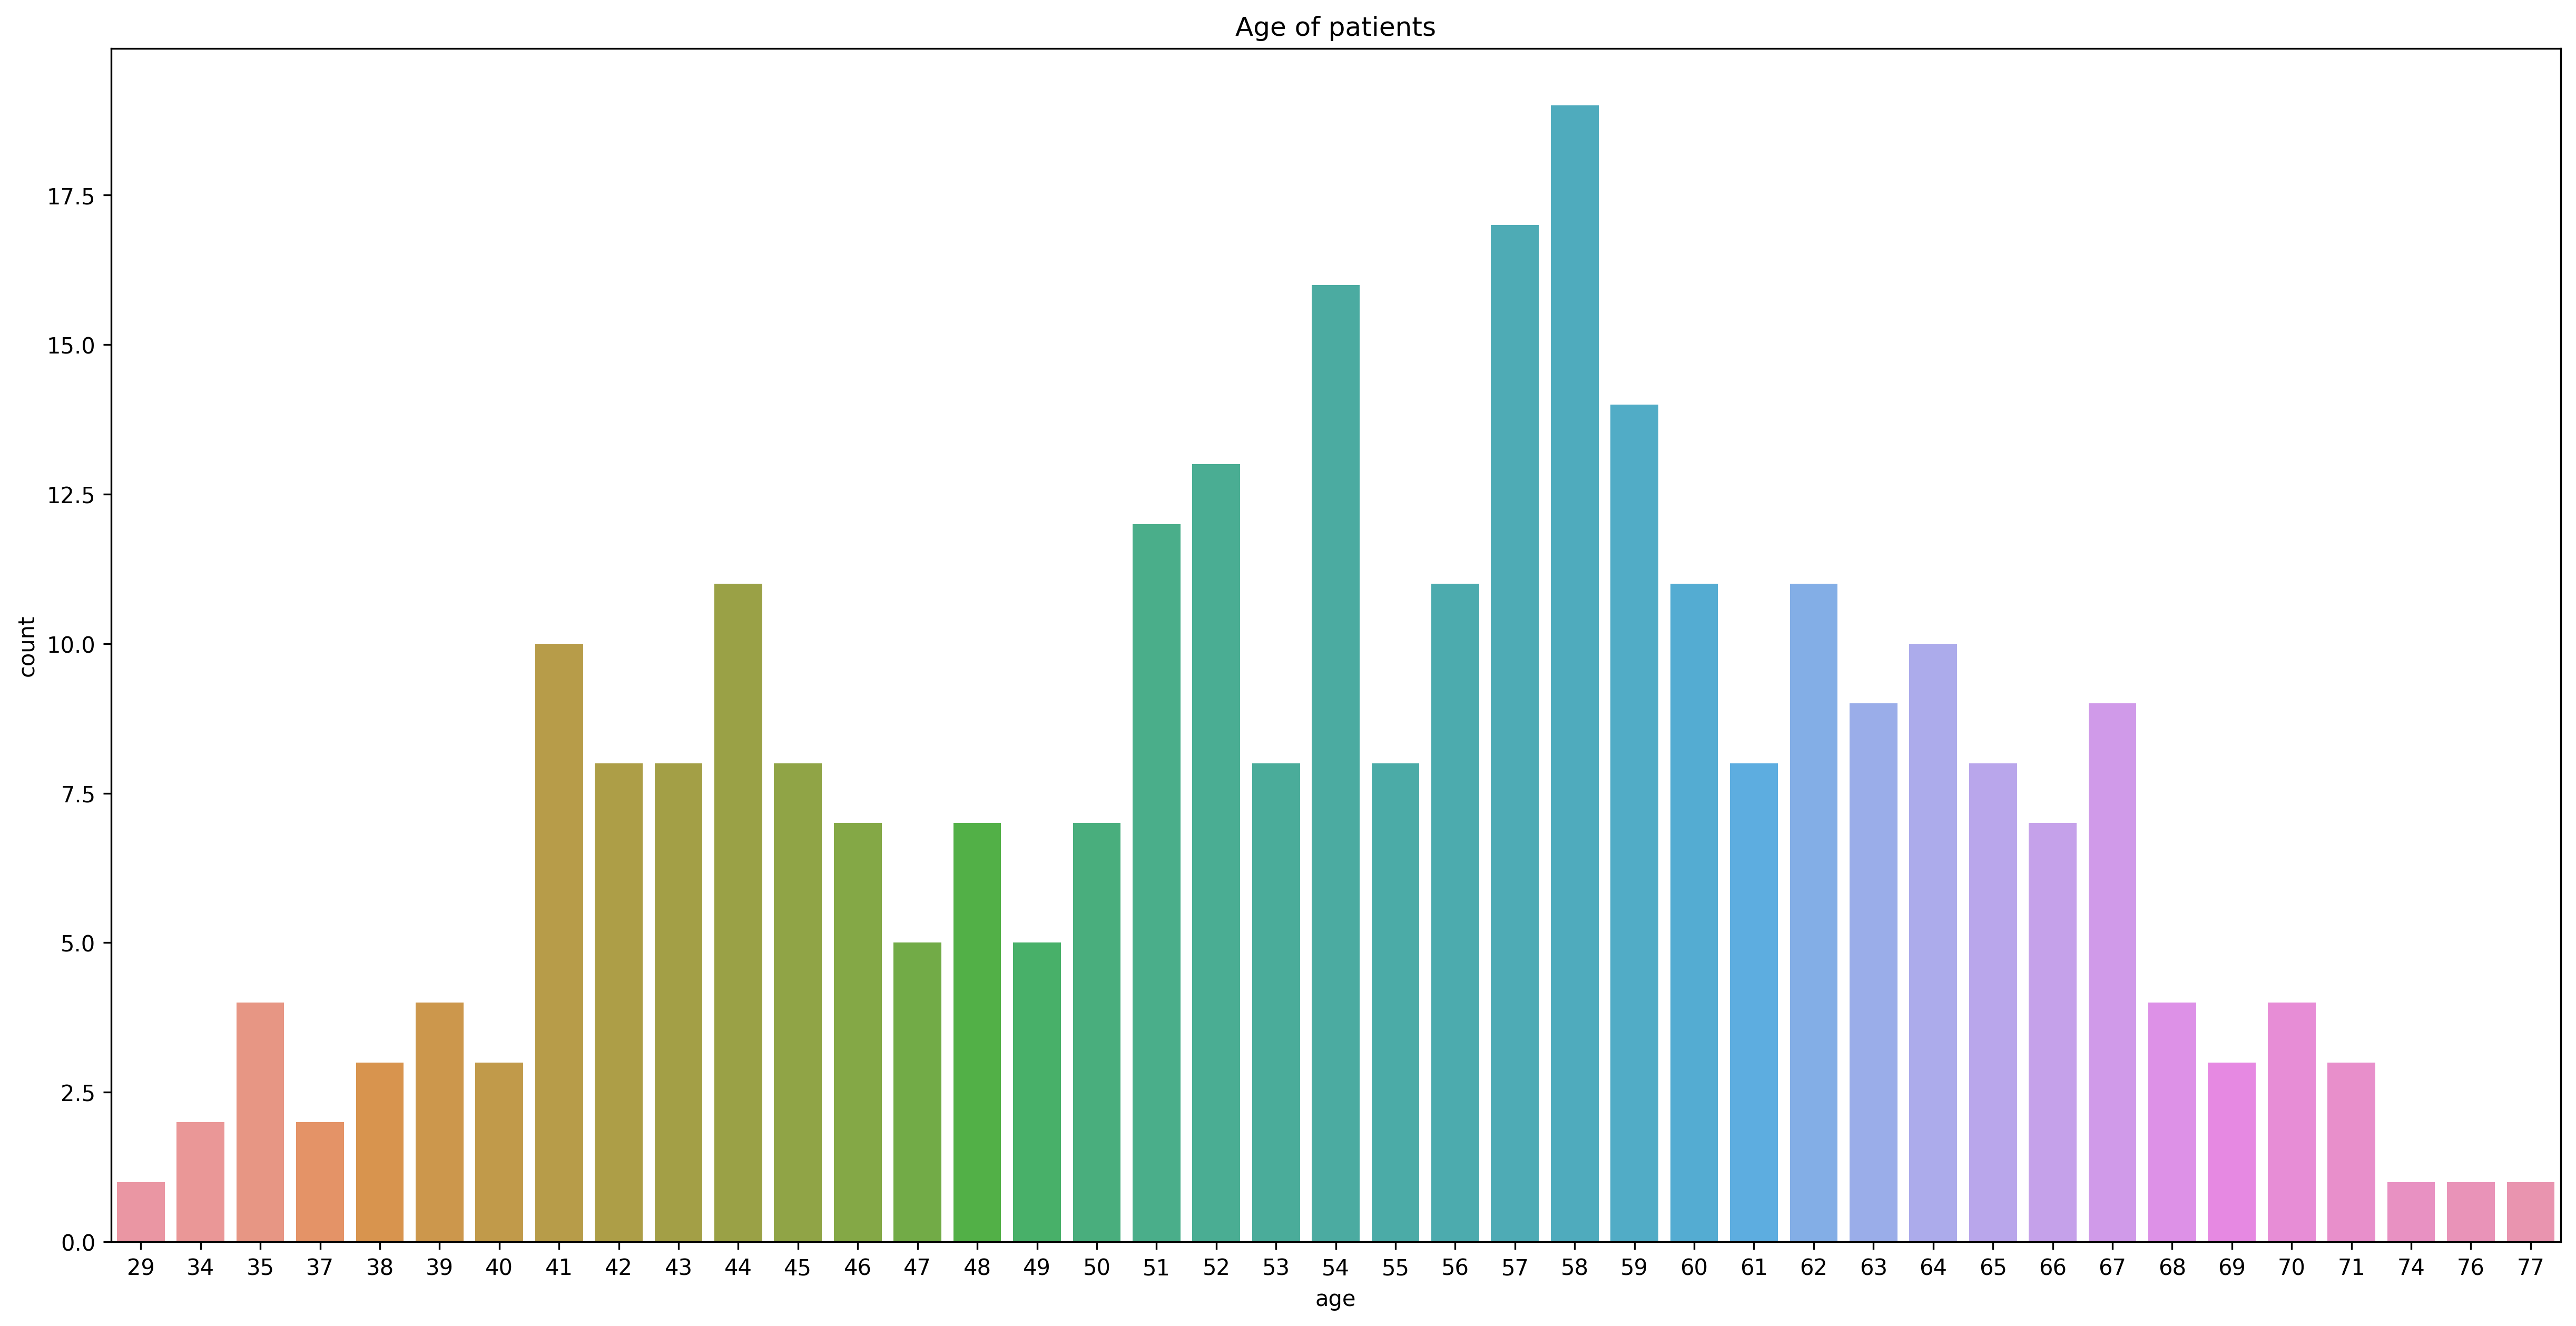

In [ ]:
plt.figure(figsize=(20,10),dpi=300, facecolor=None)
plt.title("Age of patients")
plt.xlabel("Age")
sns.countplot(heart_disease_df['age'], data = heart_disease_df)

# WE CAN SEE THE PATIENTS OF AGE GROUP 51 TO 61 YEARS ARE IN MAJORITY

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


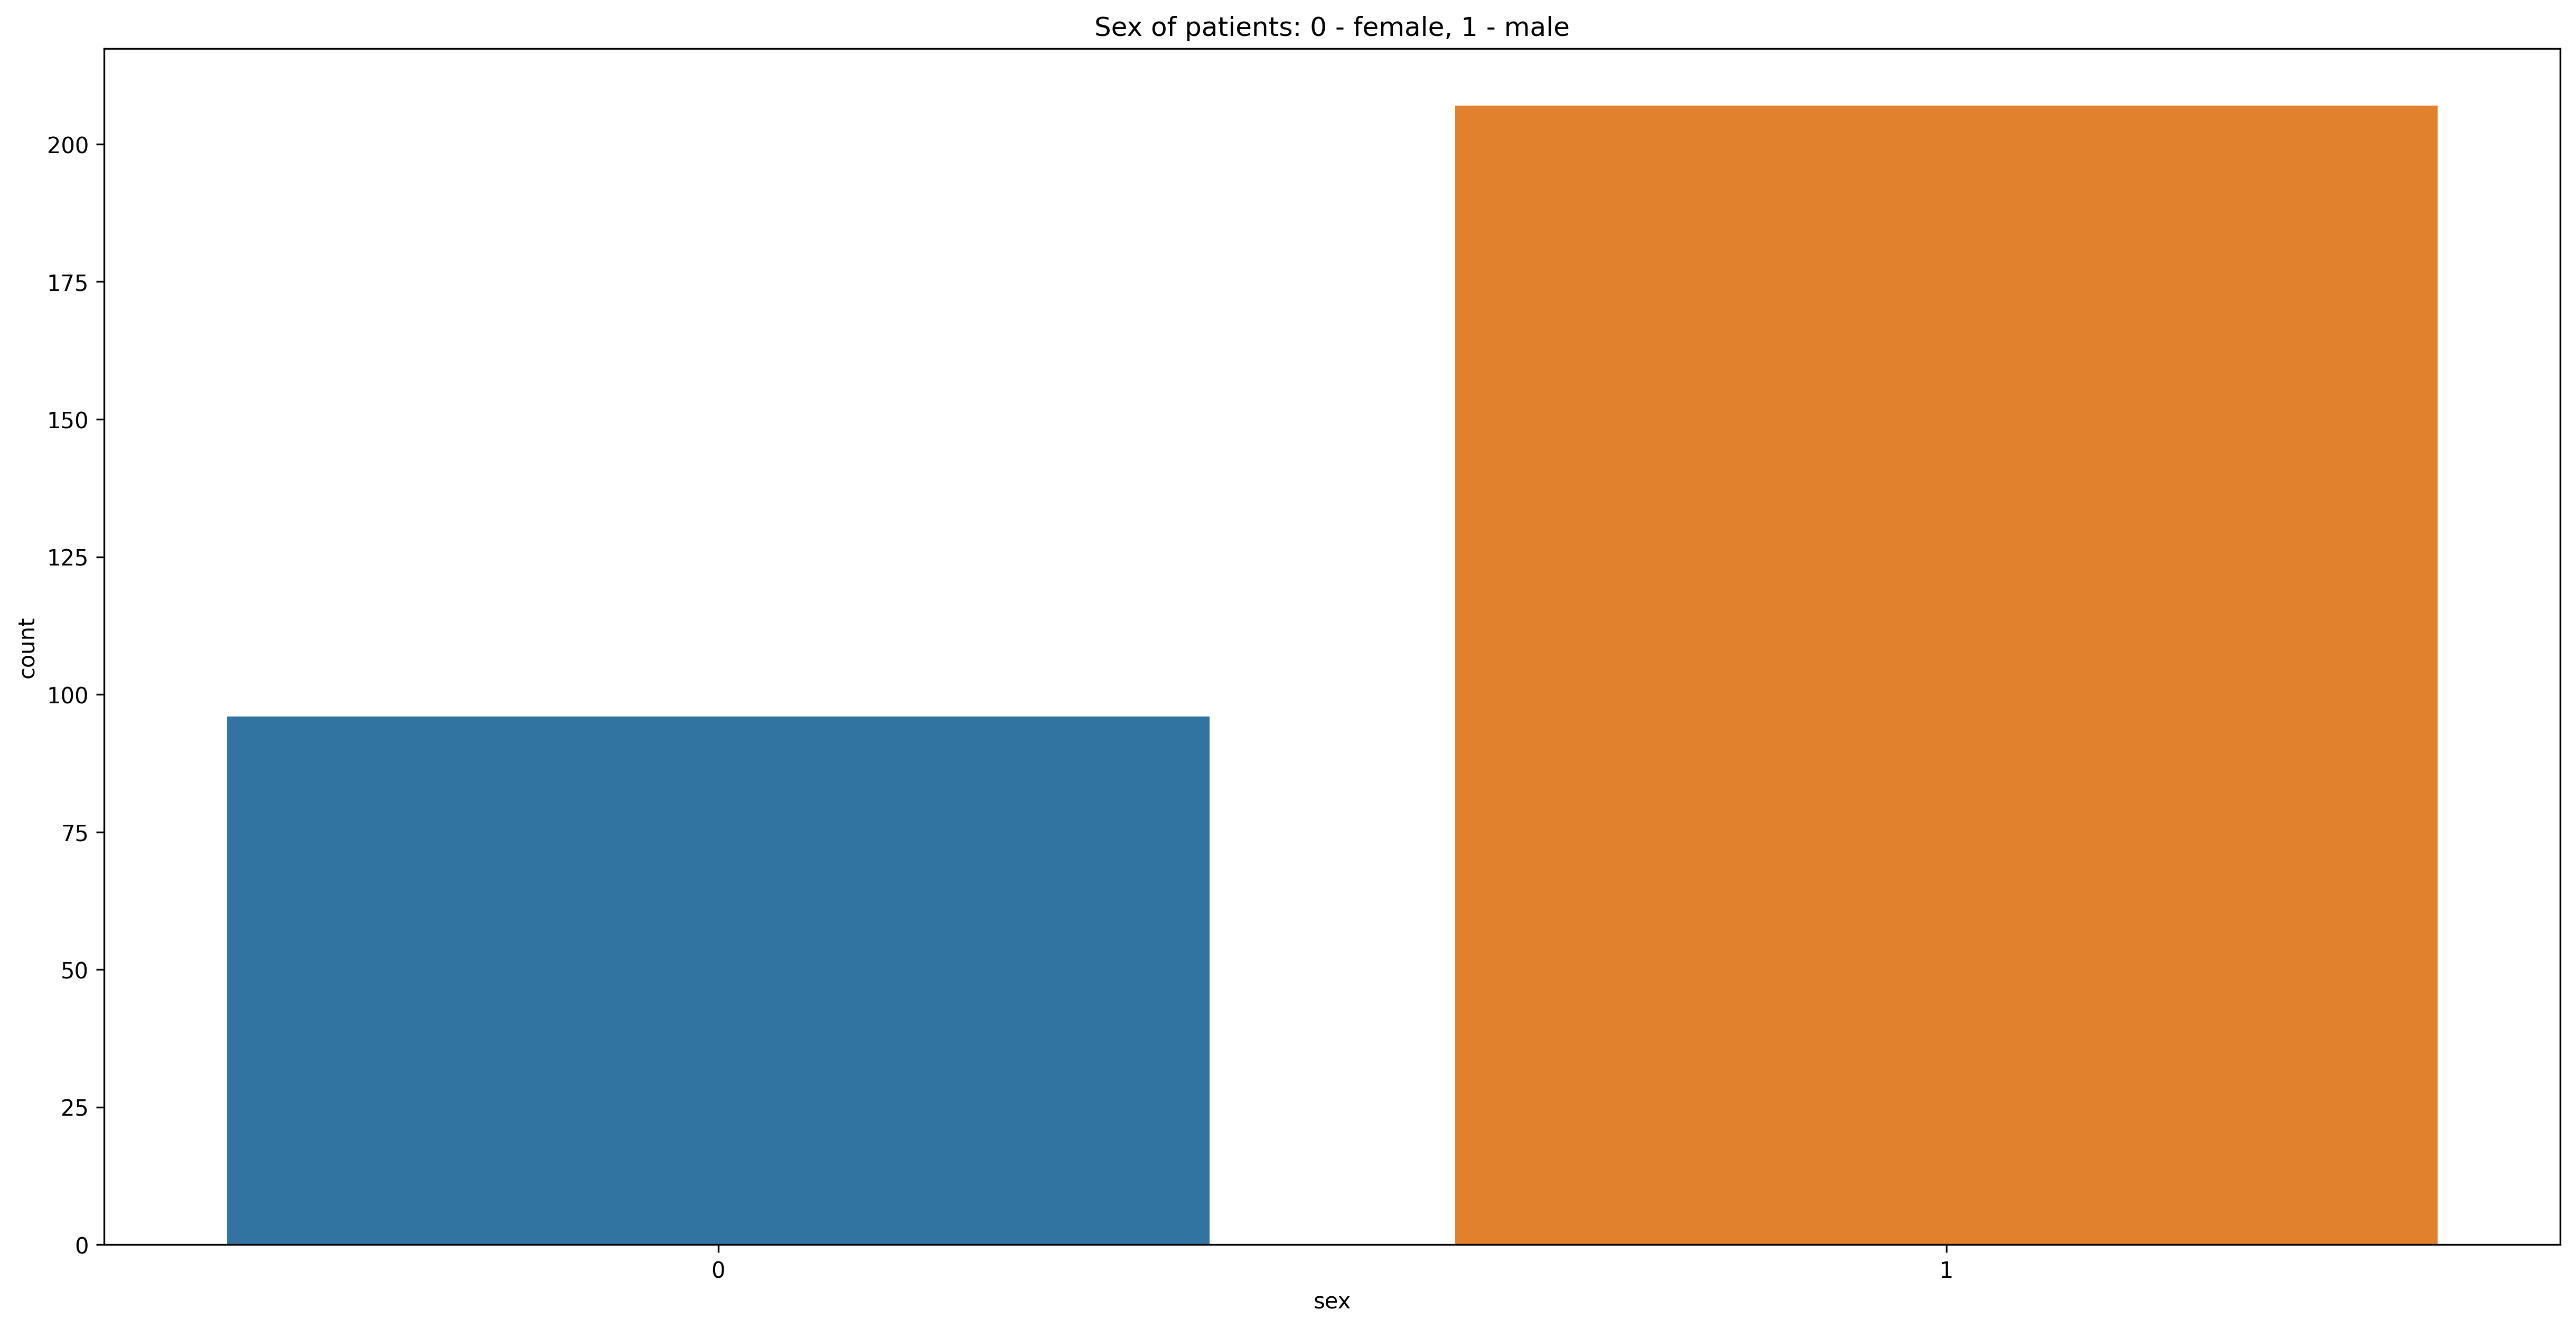

In [ ]:
plt.figure(figsize=(20,10),dpi=300, facecolor=None)
plt.title("Sex of patients: 0 - female, 1 - male")
plt.xlabel("Sex")
sns.countplot(heart_disease_df['sex'], data = heart_disease_df)

In [ ]:
cp_data = heart_disease_df['cp'].value_counts().reset_index()

In [ ]:
cp_data['index'][3] = "Asymptomatic"
cp_data['index'][2] = "Non-Anginal"
cp_data['index'][1] = "Atypical-Angina"
cp_data['index'][0] = "Typical Angina"
cp_data


,index,cp
0,Typical Angina,143
1,Atypical-Angina,87
2,Non-Anginal,50
3,Asymptomatic,23


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


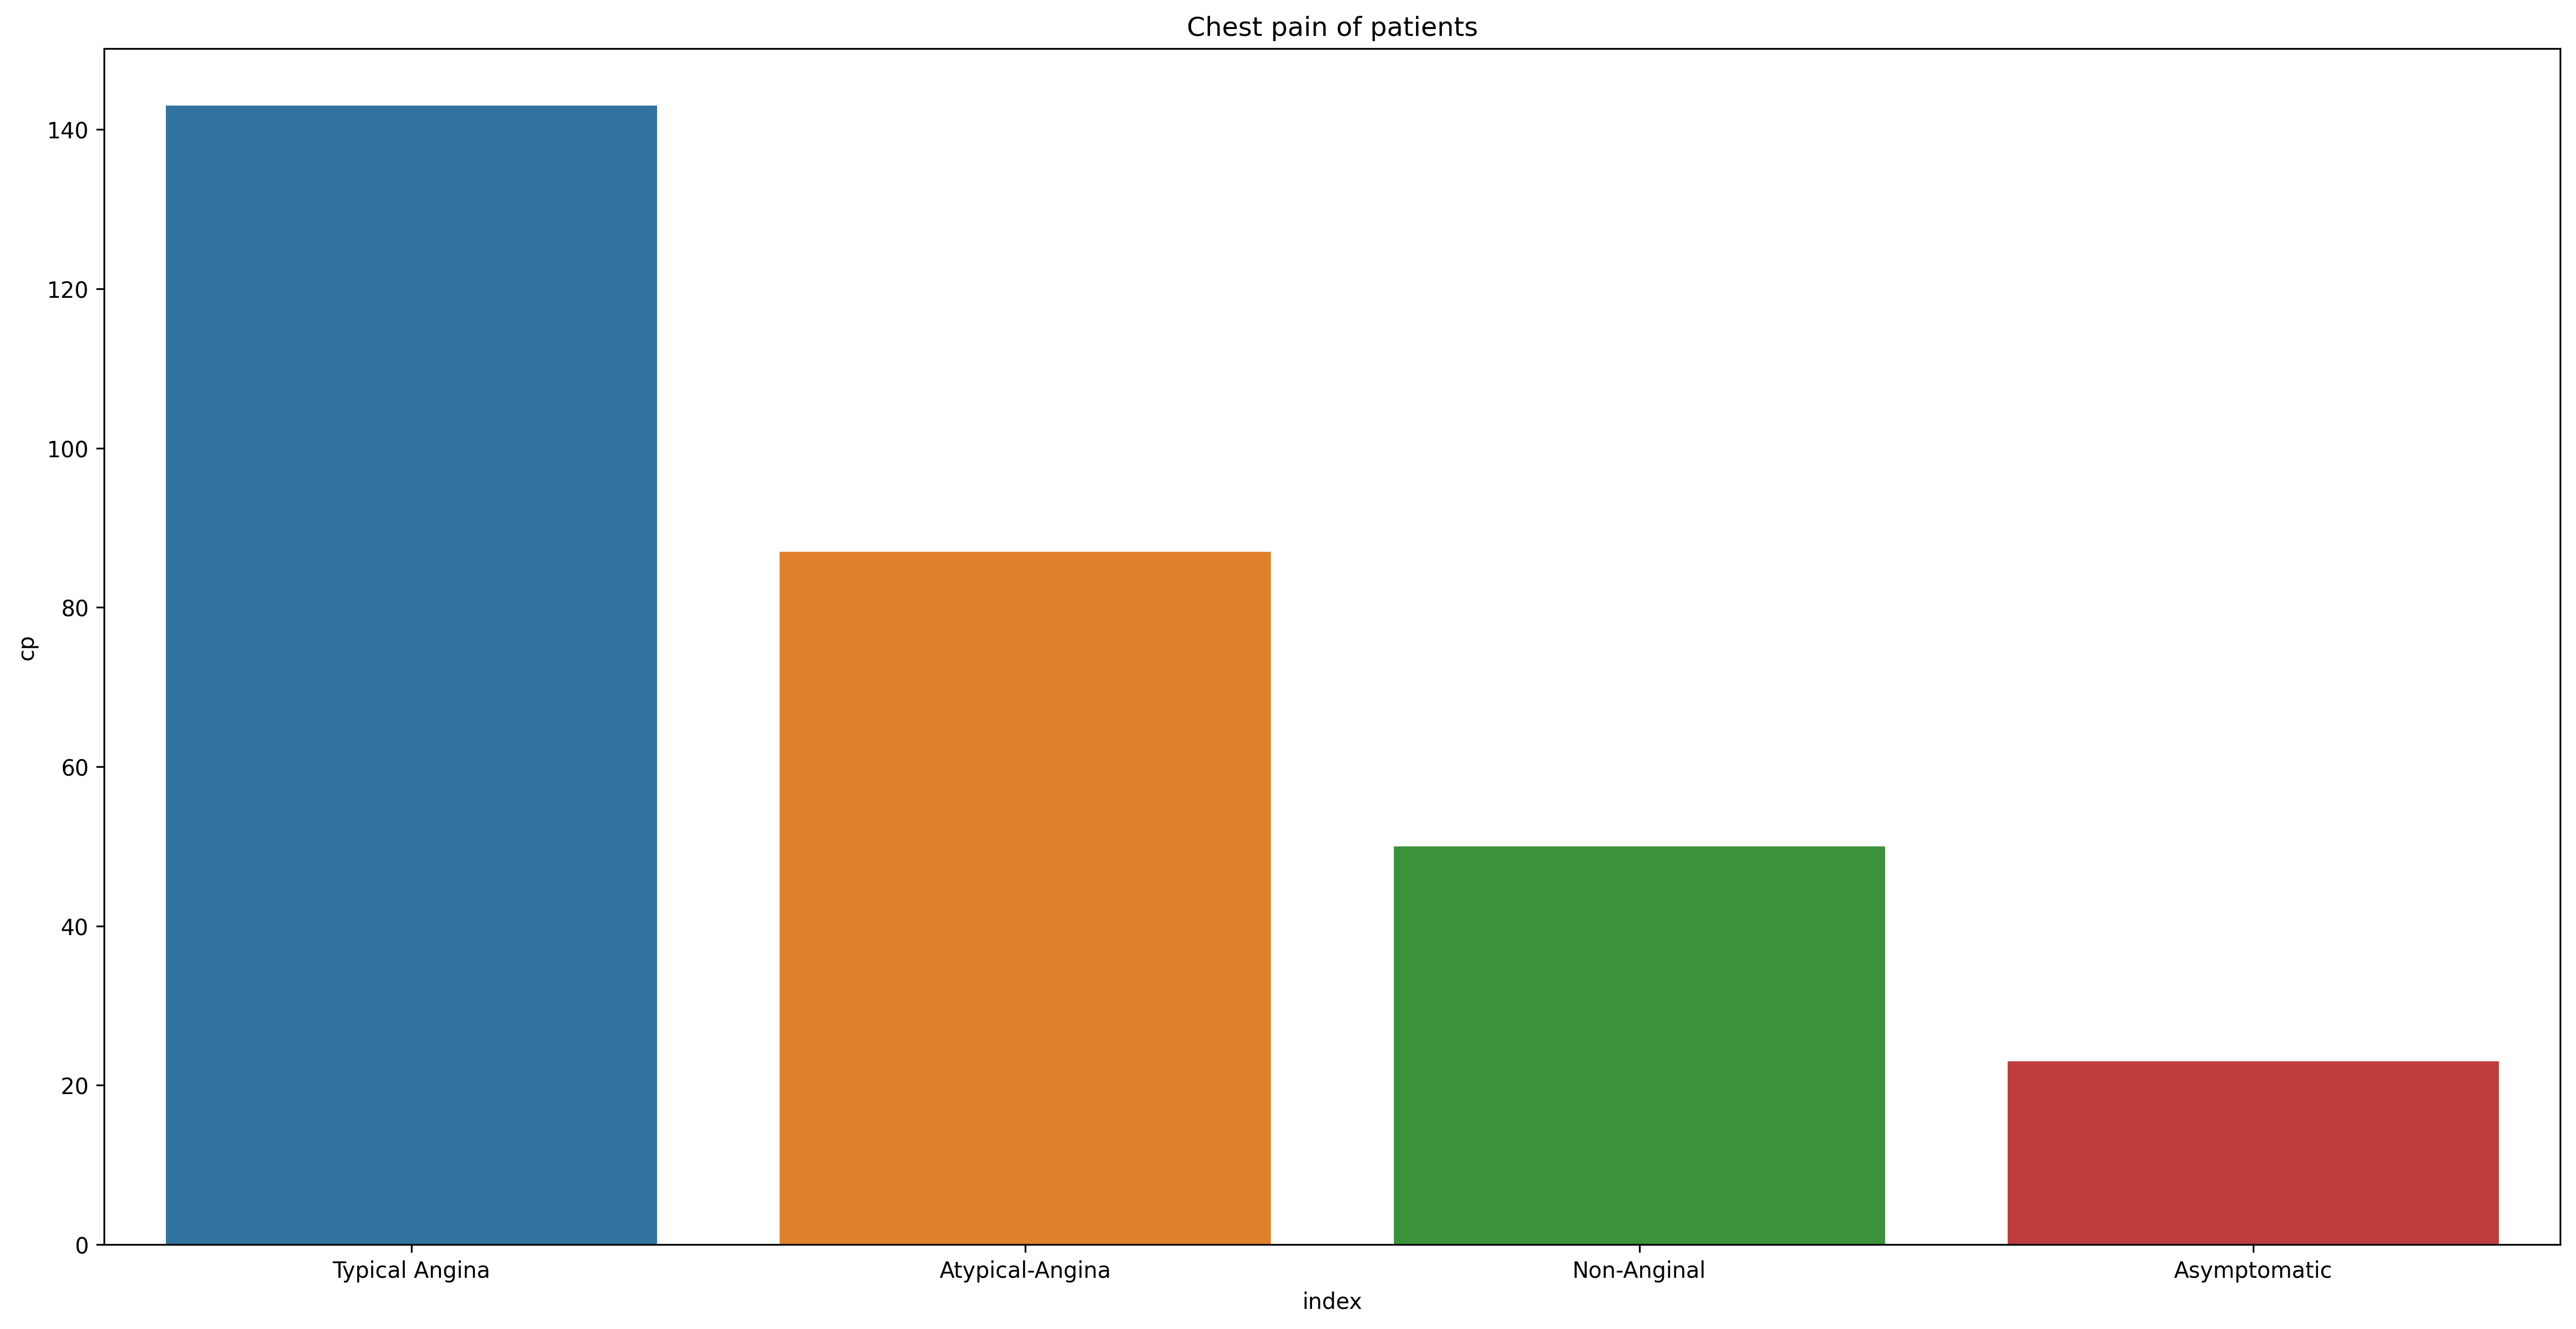

In [ ]:
plt.figure(figsize=(20,10),dpi=300, facecolor=None)
plt.title("Chest pain of patients")
sns.barplot(cp_data['index'], cp_data['cp'])

In [ ]:
ecg_data = heart_disease_df['restecg'].value_counts().reset_index()
ecg_data['index'][0] = "Normal"
ecg_data['index'][1] = "Having ST-T Wave Abnormality"
ecg_data['index'][2] = "Showing Probable or Definite Left Ventricle Hypertrophy by Estes"
ecg_data


,index,restecg
0,Normal,152
1,Having ST-T Wave Abnormality,147
2,Showing Probable or Definite Left Ventricle Hy...,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


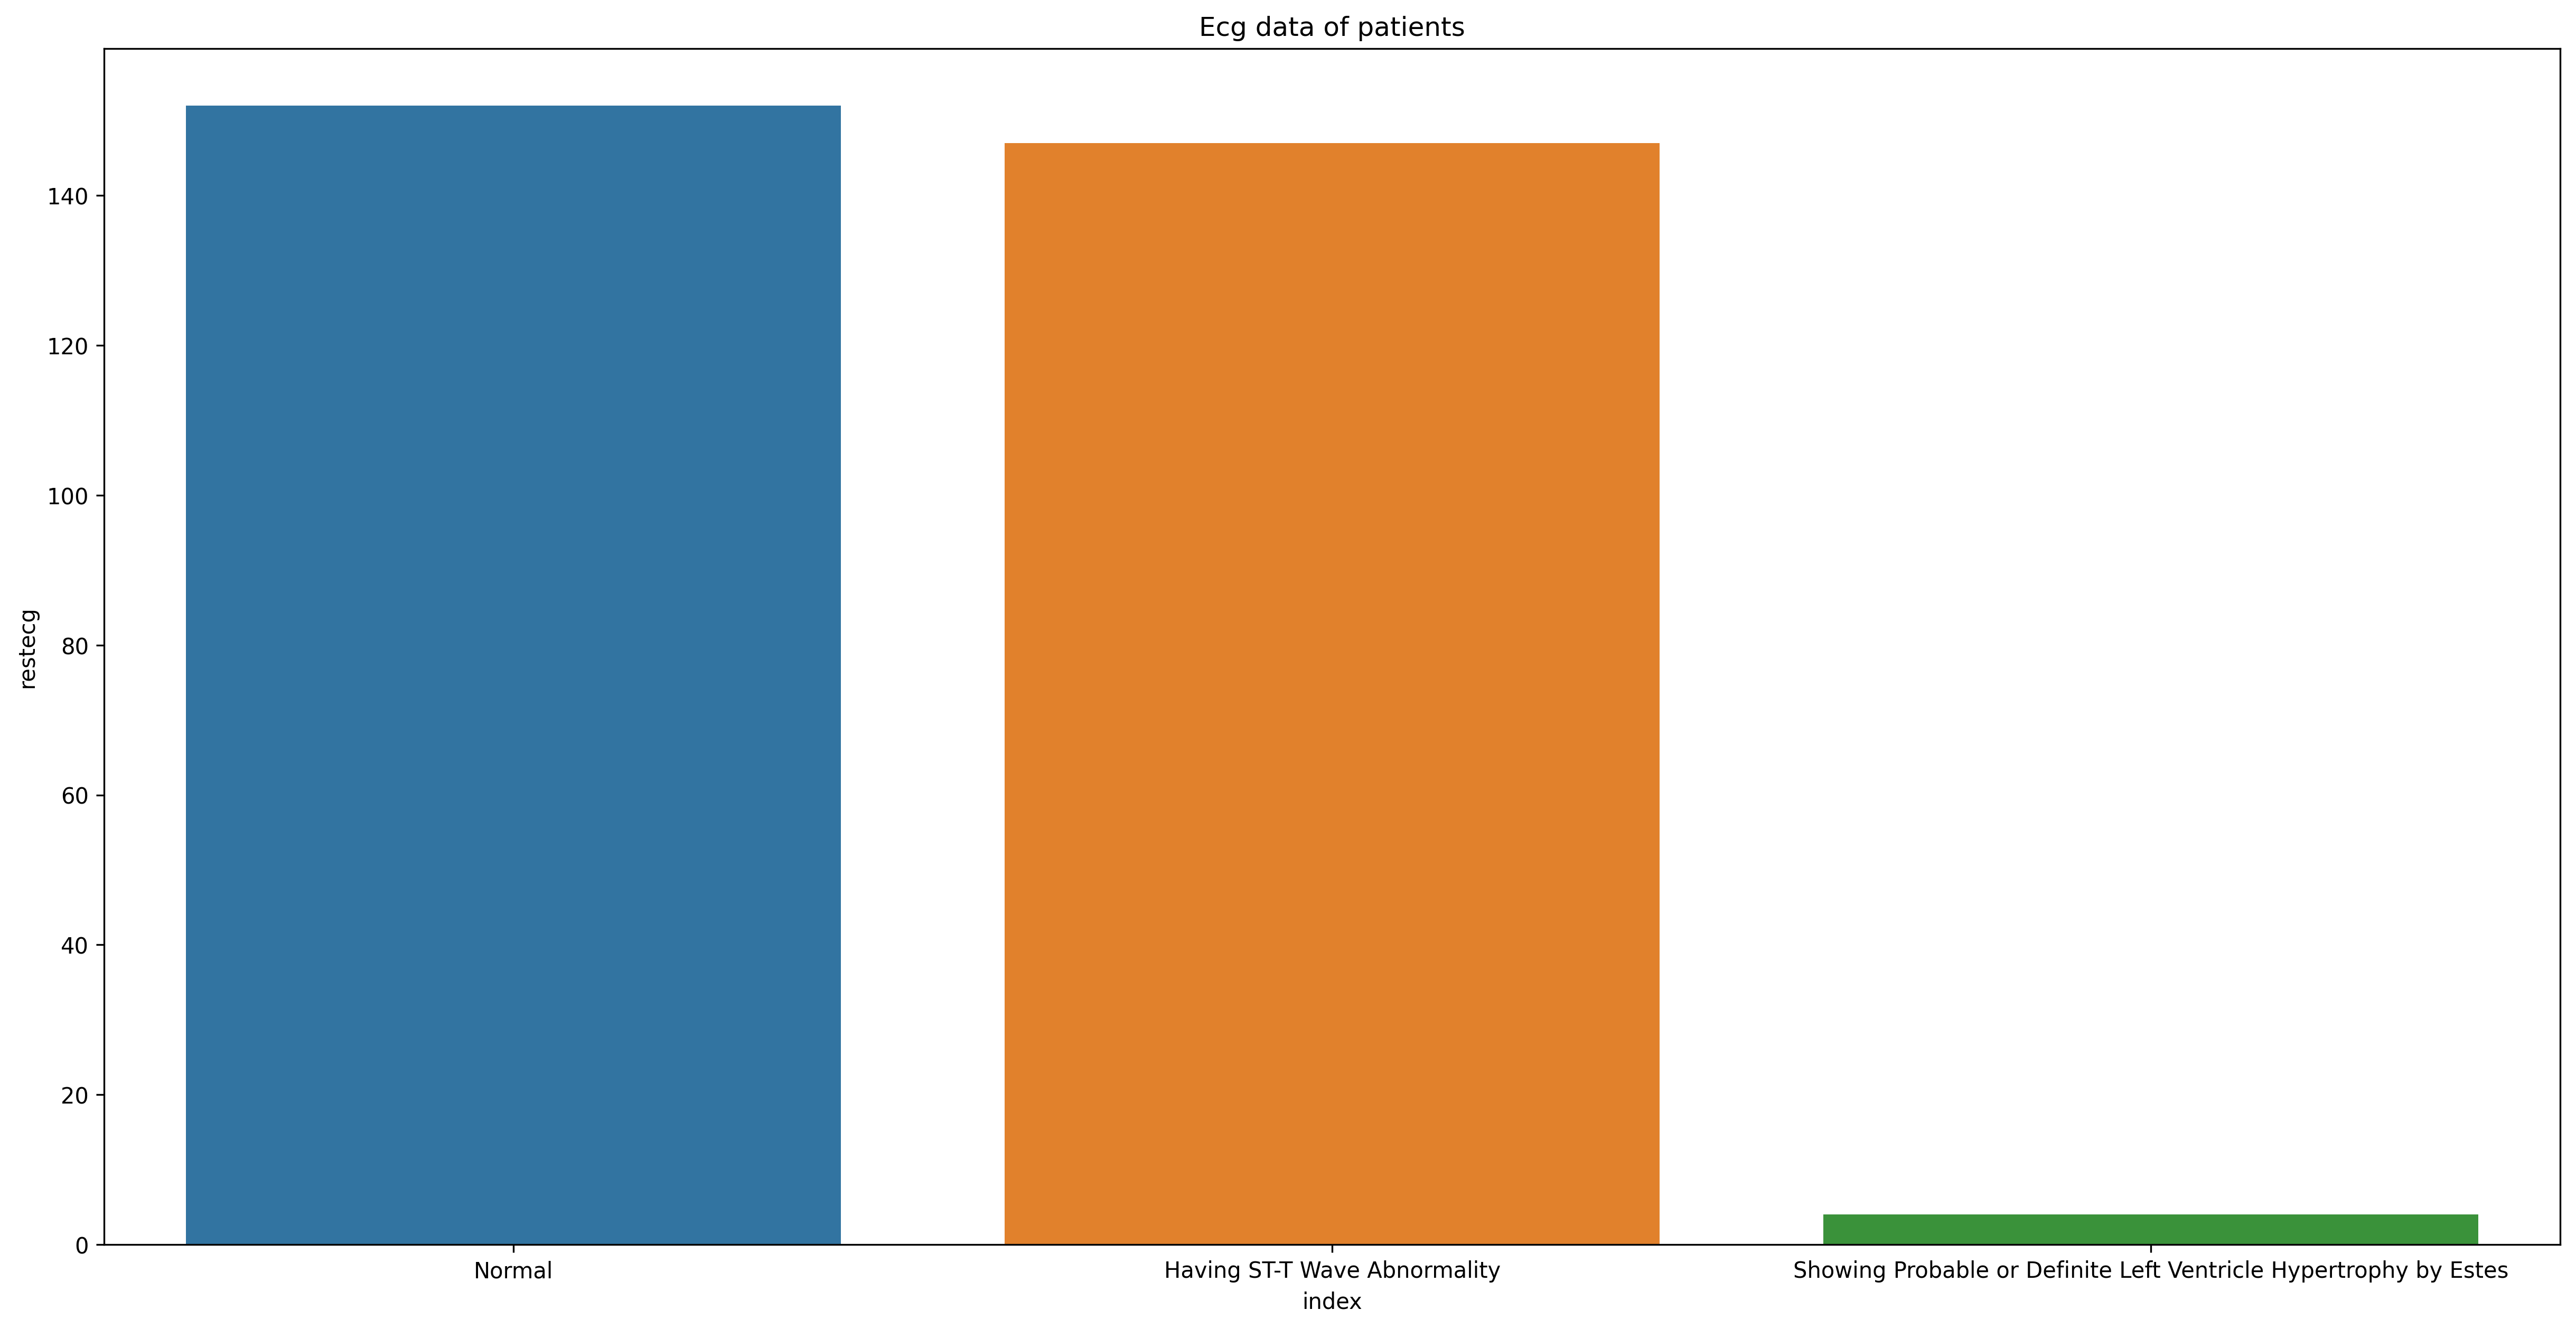

In [ ]:
plt.figure(figsize=(20,10),dpi=300, facecolor=None)
plt.title("Ecg data of patients")
sns.barplot(ecg_data['index'], ecg_data['restecg'])

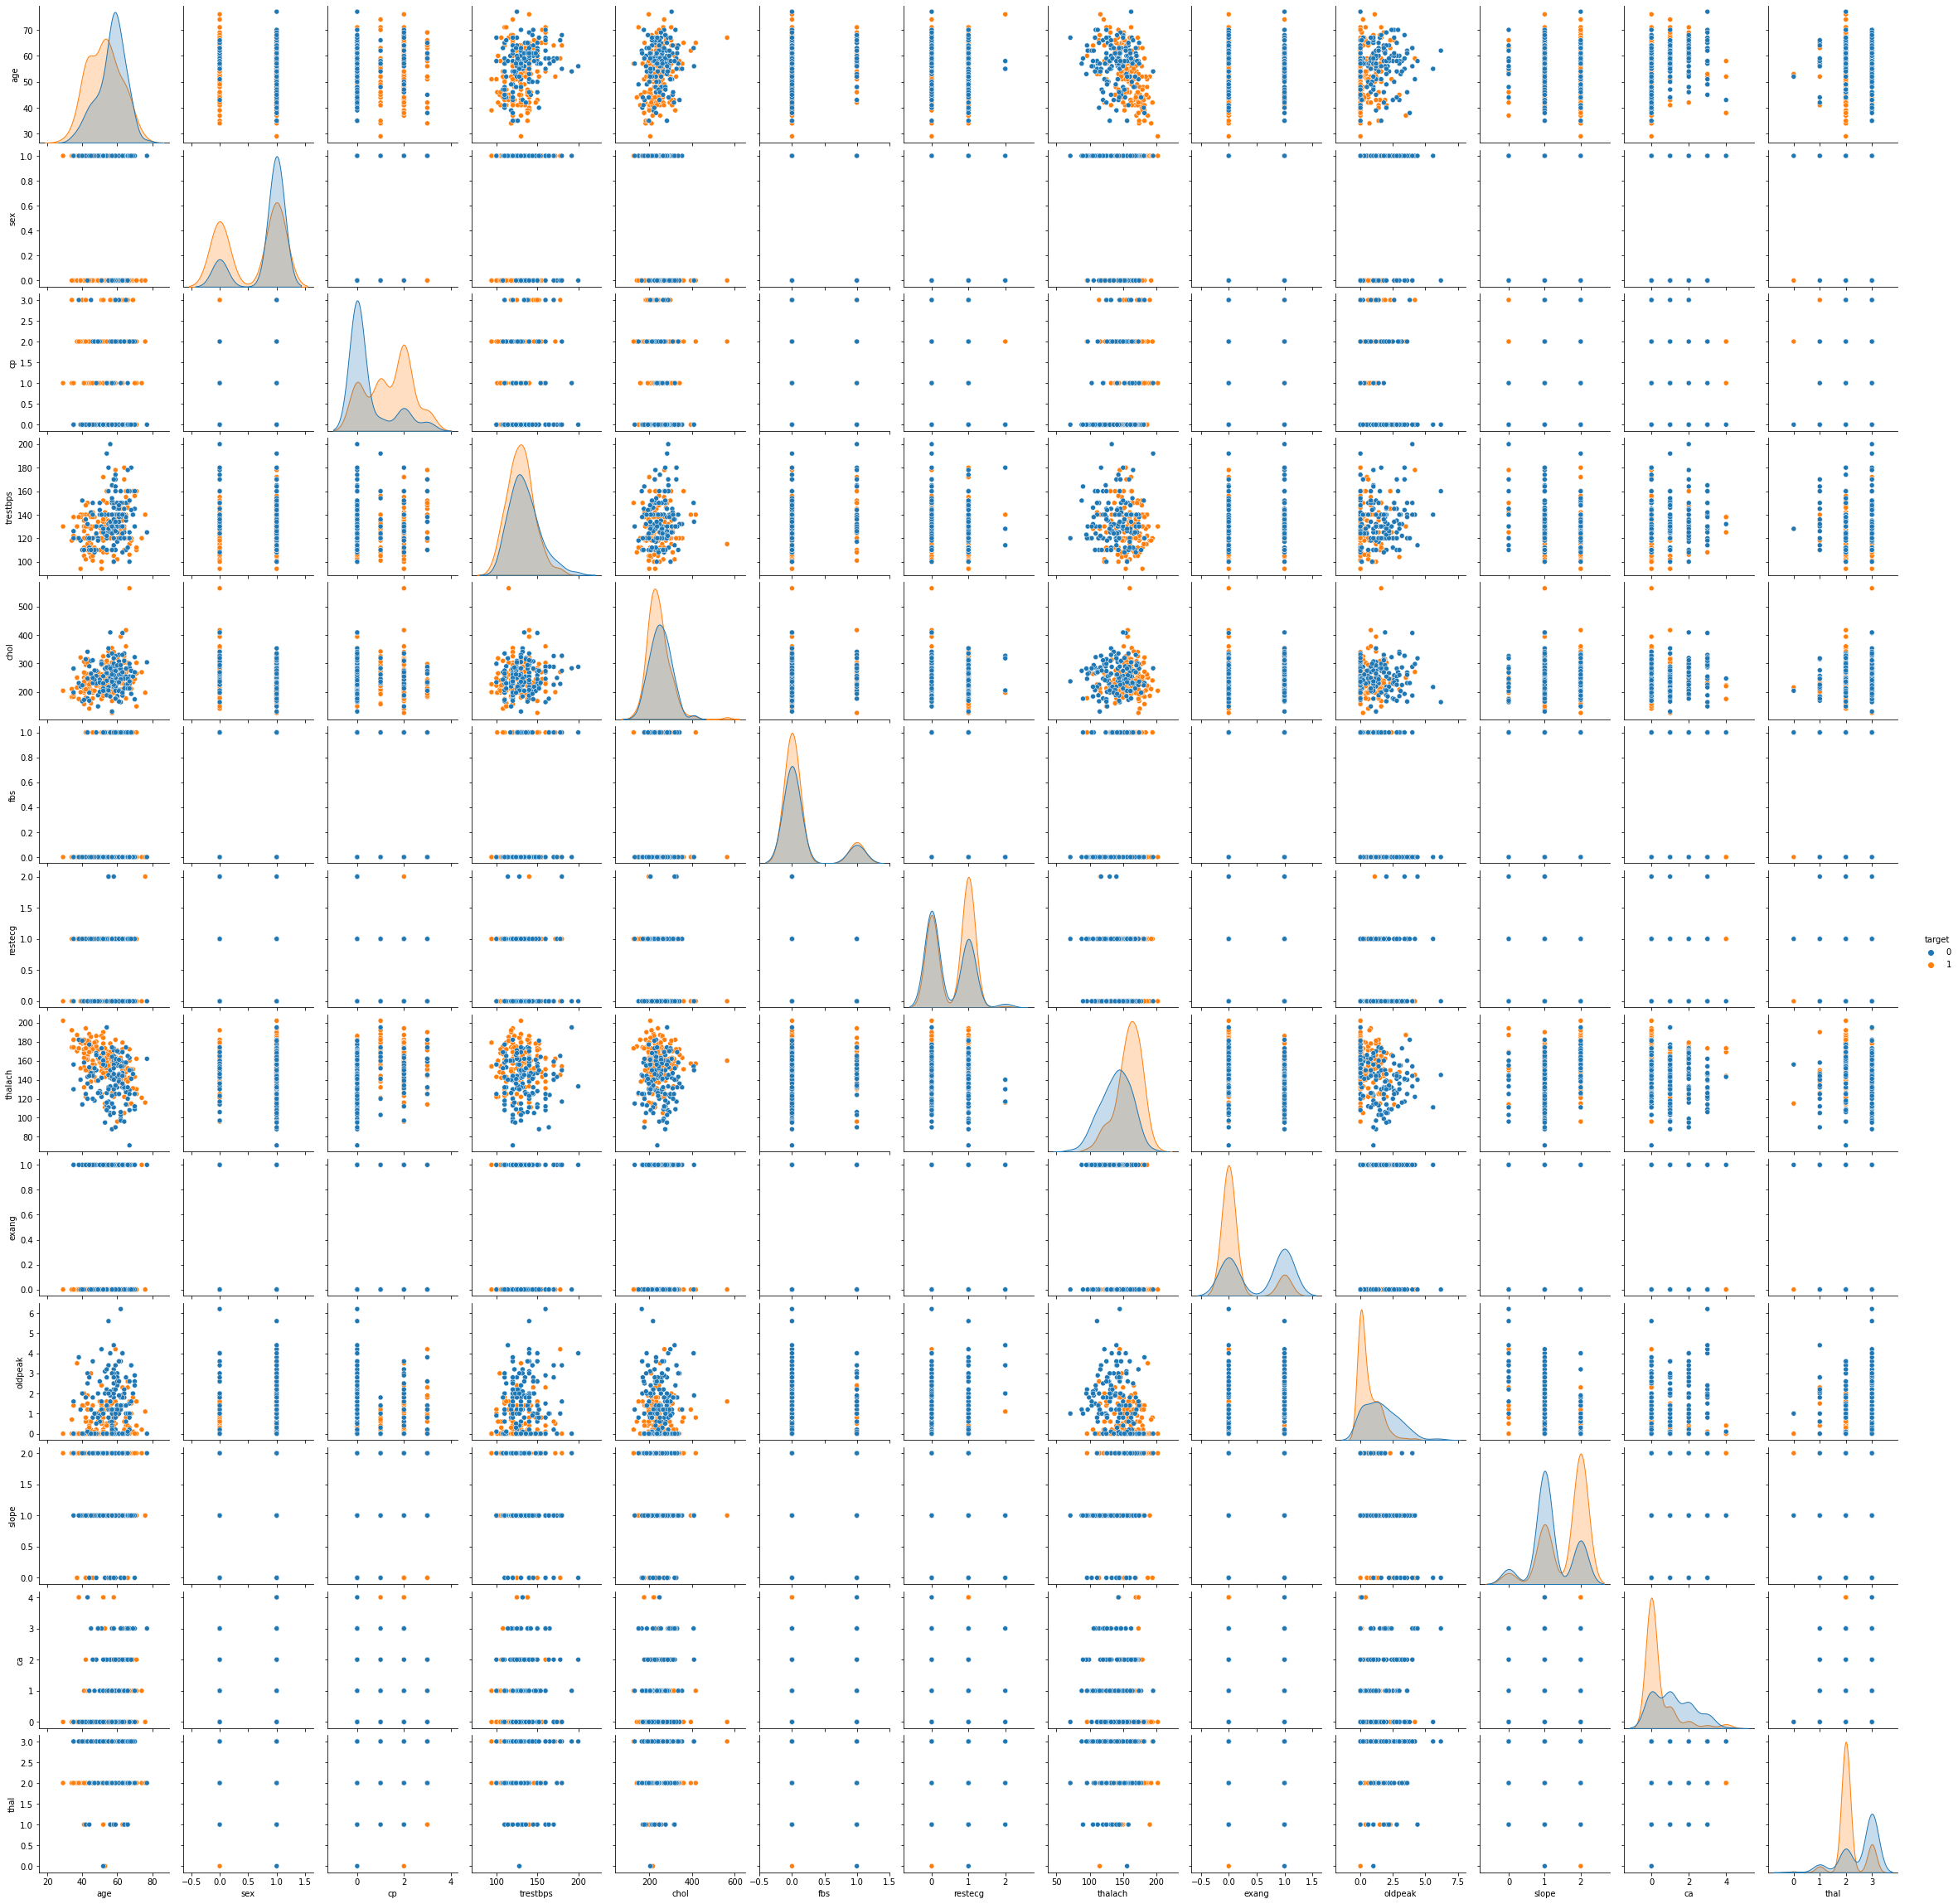

In [ ]:
# ECG DATA PLOT
sns.pairplot(heart_disease_df, hue='target', data=heart_disease_df)
plt.savefig("pair-plot_heart_desease",dpi=400)


# LET'S SEE FOR CONTINOUS VARIABLES

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'MAXIMUM HEART RATE ACHIEVED (bpm)')

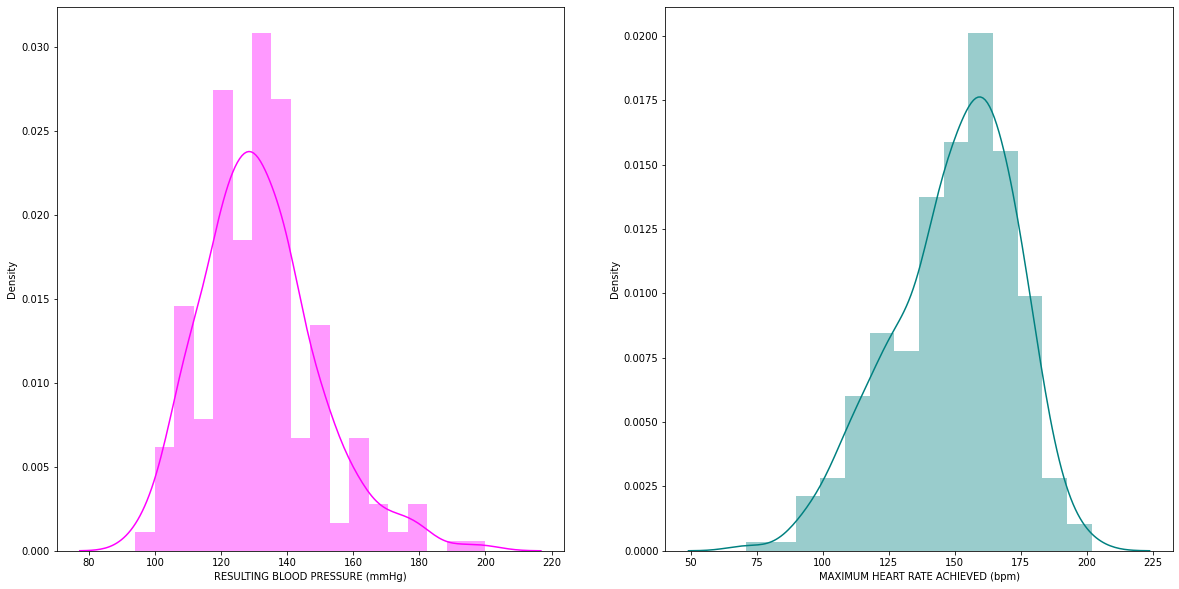

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(heart_disease_df['trestbps'], kde=True, color='magenta')
plt.xlabel("RESULTING BLOOD PRESSURE (mmHg)")
plt.subplot(1,2,2)
sns.distplot(heart_disease_df['thalach'], kde=True, color='teal')
plt.xlabel("MAXIMUM HEART RATE ACHIEVED (bpm)")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


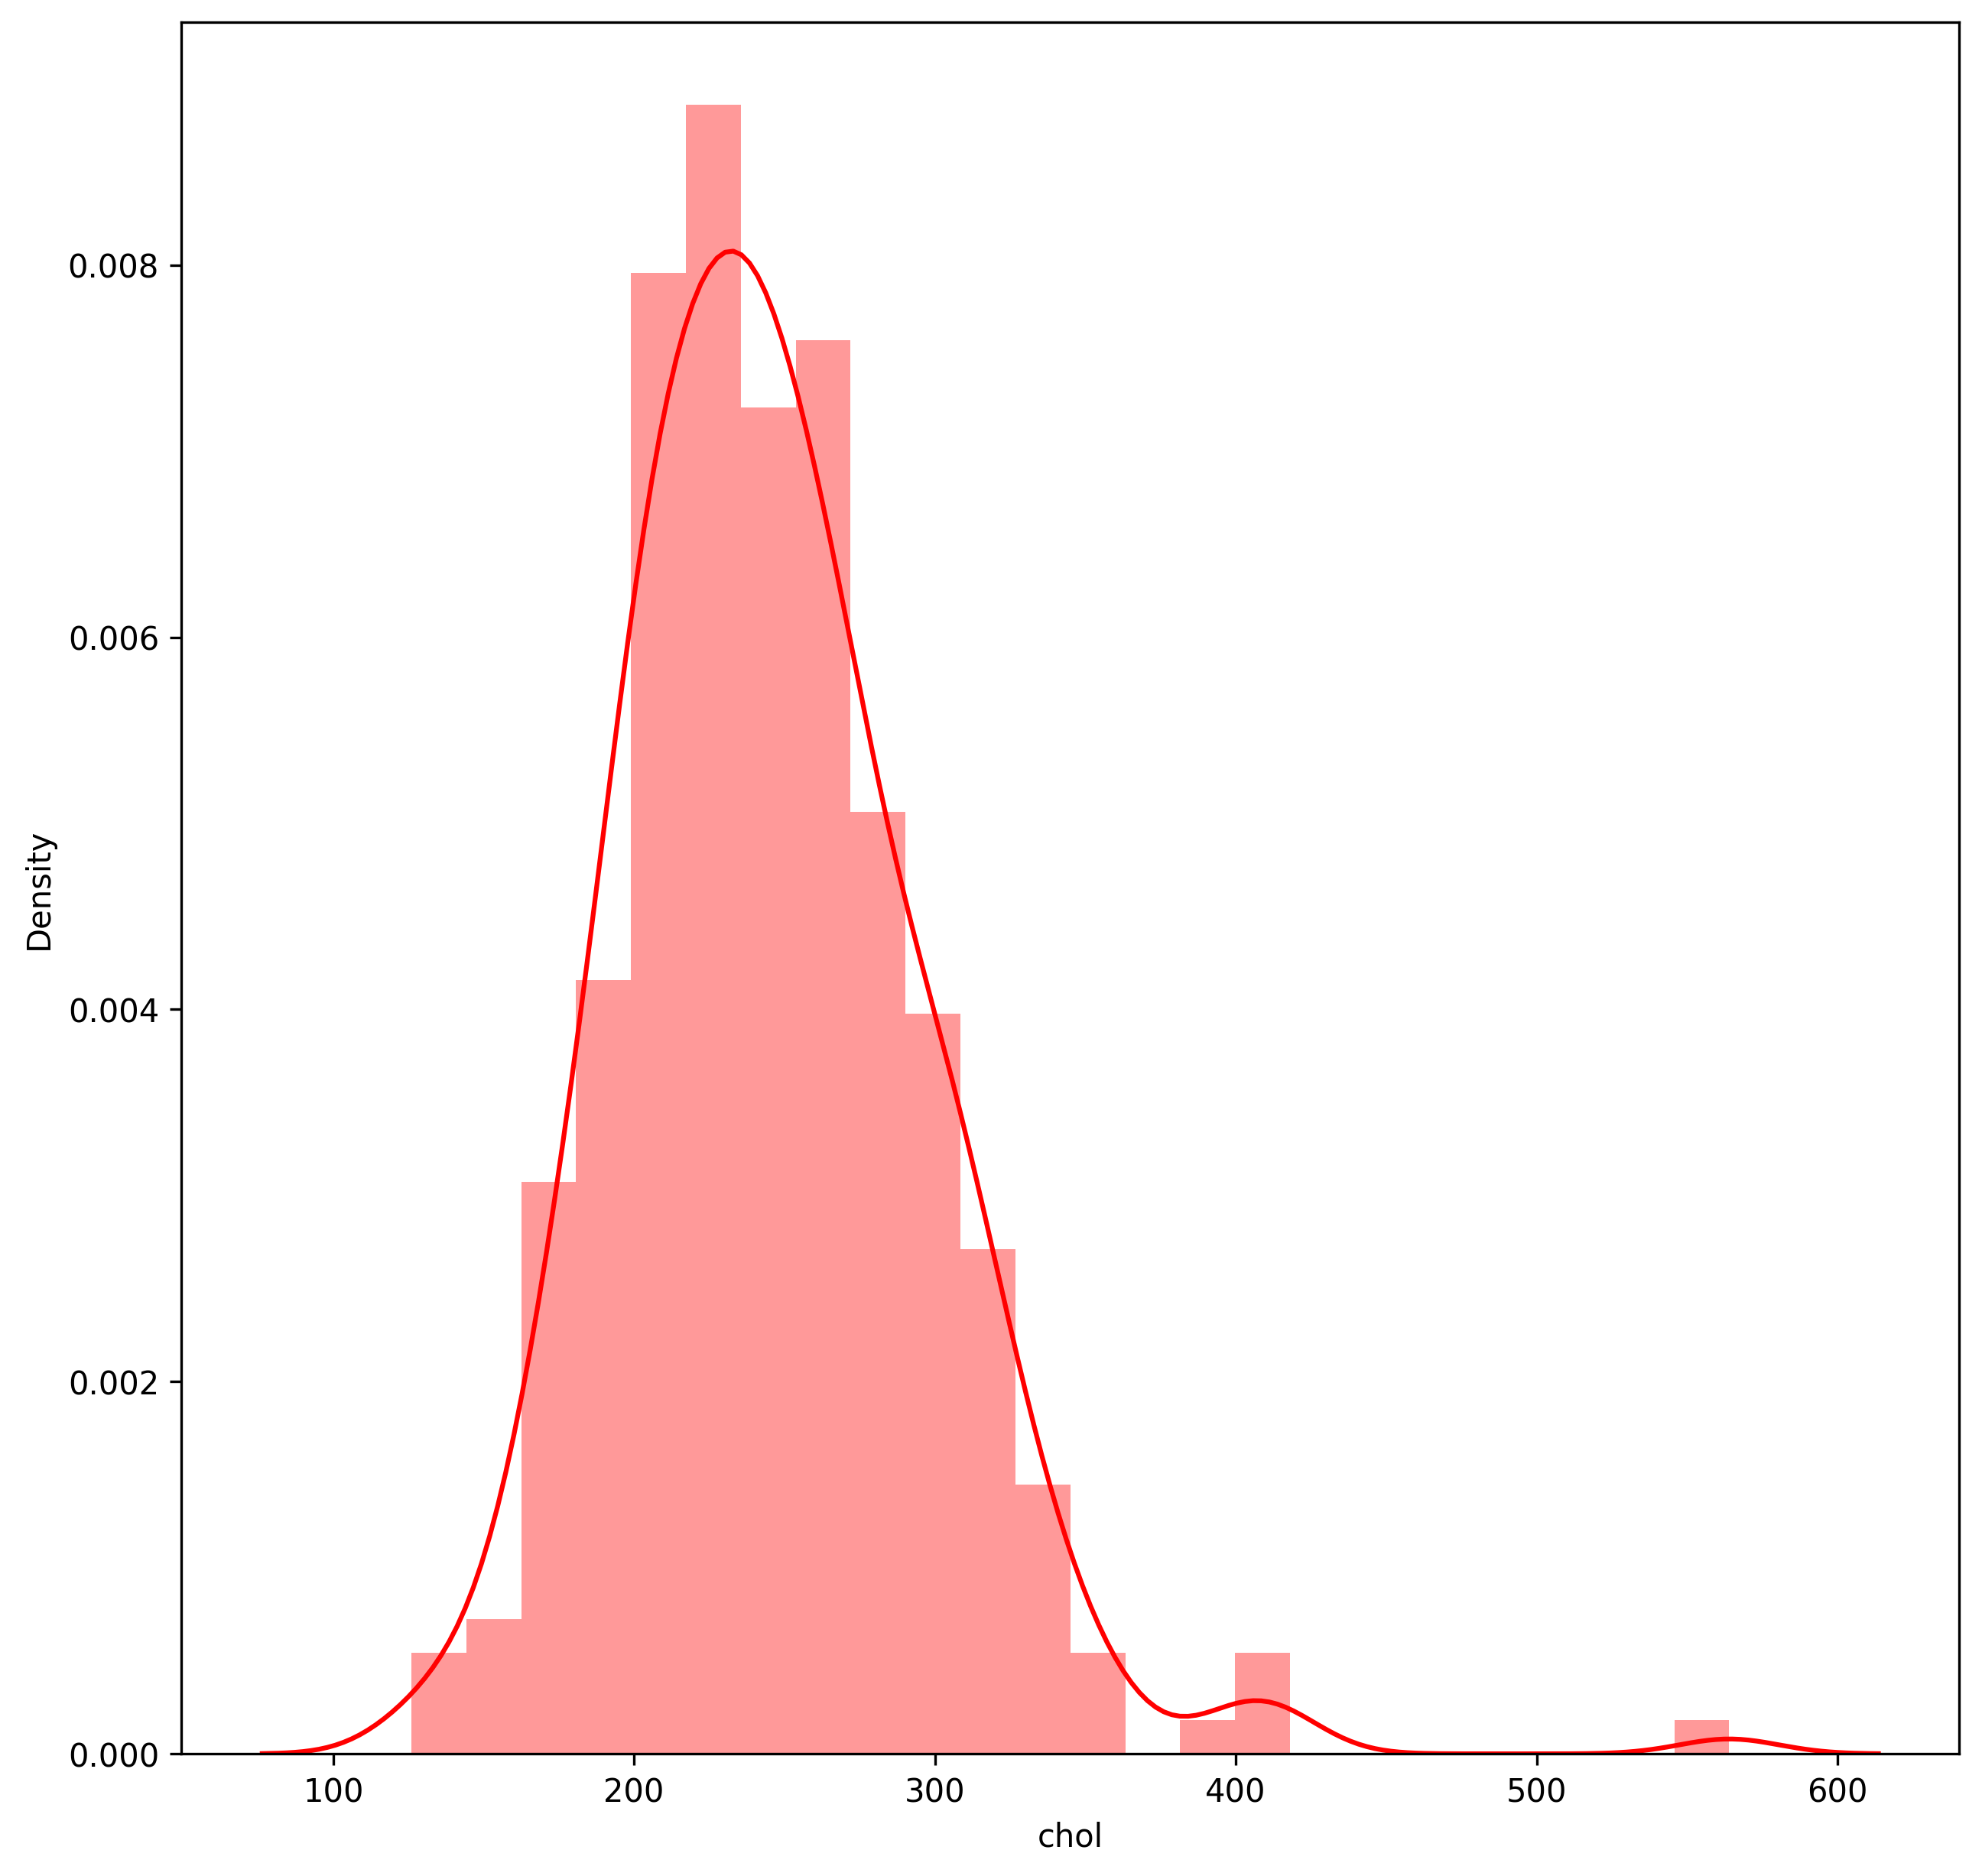

In [ ]:
plt.figure(figsize=(10,10),dpi=300, facecolor=None)
plt.xlabel("cholesterol")
sns.distplot(heart_disease_df['chol'], kde=True, color='red')

# STANDARDIZATION 

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(heart_disease_df)

StandardScaler()

In [ ]:
heart_disease_df = scale.transform(heart_disease_df)

In [ ]:
heart_disease_df

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -0.71442887,
        -2.14887271,  0.91452919],
       [-1.91531289,  0.68100522,  1.00257707, ..., -0.71442887,
        -0.51292188,  0.91452919],
       [-1.47415758, -1.46841752,  0.03203122, ..., -0.71442887,
        -0.51292188,  0.91452919],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ...,  1.24459328,
         1.12302895, -1.09345881],
       [ 0.29046364,  0.68100522, -0.93851463, ...,  0.26508221,
         1.12302895, -1.09345881],
       [ 0.29046364, -1.46841752,  0.03203122, ...,  0.26508221,
        -0.51292188, -1.09345881]])

In [ ]:
heart_disease_df = pd.DataFrame(heart_disease_df, columns=["age", "sex",	"cp"	,"trestbps",	"chol",	"fbs"	,"restecg", "thalach",	"exang"	,"oldpeak"	,"slope"	,"ca", "thal", "target"])

In [ ]:
heart_disease_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,0.914529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029,-1.093459
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029,-1.093459
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029,-1.093459
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029,-1.093459


# INSERTING DATA INTO MACHINE LEARNING MODELS

# We will use the following models for our predictions











In [ ]:
#Logistic Regression
#Decision Tree
#Random Forest
#K-Nearest Neighbor 
#SVM

# THEN WE WILL USE THE ENSEMBLING MODELS

In [ ]:
X = heart_disease_df.iloc[:,:-1]
Y = heart_disease_df.iloc[:,-1:]

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029


In [ ]:
Y

,target
0,0.914529
1,0.914529
2,0.914529
3,0.914529
4,0.914529
...,...
298,-1.093459
299,-1.093459
300,-1.093459
301,-1.093459


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [ ]:
encoded_Y = lbl.fit_transform(Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
LogReg = LogisticRegression()

In [ ]:
LogReg.fit(X_train, encoded_Y)

LogisticRegression()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
encoded_Ytest = lbl.fit_transform(Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
Y_pred1 = LogReg.predict(X_test)
lr_conf_matrix = confusion_matrix(encoded_Ytest,Y_pred1)

In [ ]:
lr_acc_score = accuracy_score(encoded_Ytest,Y_pred1)

In [ ]:
Y_pred1

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0])

In [ ]:
lr_conf_matrix

array([[35,  9],
       [ 4, 43]])

In [ ]:
print(lr_acc_score*100,"%")

85.71428571428571 %


# WE SEE THAT THE LOGISTIC REGRESSION MODEL HAS 85% ACCURACY 

# DECISION TREE MODEL

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [ ]:
tree.fit(X_train,encoded_Y)

DecisionTreeClassifier()

In [ ]:
Y_pred2 = tree.predict(X_test)

In [ ]:
encoded_Ytest = lbl.fit_transform(Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
tree_conf_matrix = confusion_matrix(encoded_Ytest,Y_pred2)

In [ ]:
tree_acc_score = accuracy_score(encoded_Ytest,Y_pred2)

In [ ]:
tree_conf_matrix

array([[30, 14],
       [ 3, 44]])

In [ ]:
tree_acc_score

0.8131868131868132

In [ ]:
print(tree_acc_score*100,"%")

81.31868131868131 %


# WE SEE THAT THE DECISION TREE MODEL HAS 81% ACCURACY 

---



---



# RANDOM FOREST MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,encoded_Y)

RandomForestClassifier()

In [ ]:
Y_pred3 = rf.predict(X_test)

In [ ]:
rf_conf_matrix = confusion_matrix(encoded_Ytest, Y_pred3)

In [ ]:
rf_acc_score = accuracy_score(encoded_Ytest, Y_pred3)

In [ ]:
rf_acc_score

0.8351648351648352

In [ ]:
rf_conf_matrix

array([[34, 10],
       [ 5, 42]])

In [ ]:
print(rf_acc_score*100,"%")

83.51648351648352 %


# WE SEE THAT THE RANDOM FOREST MODEL HAS 83% ACCURACY 
